In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
from tools import *
#import pdb
#pdb.set_trace()

# Partie 1 : SIFT

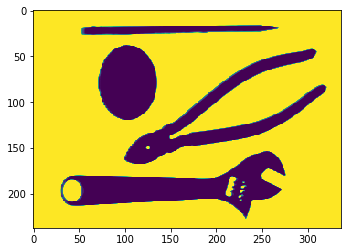

In [2]:
# example images
I = read_grayscale('data/tools.tiff')
I2 = read_grayscale('data/Scene/CALsuburb/image_0205.jpg')
plt.imshow(I)

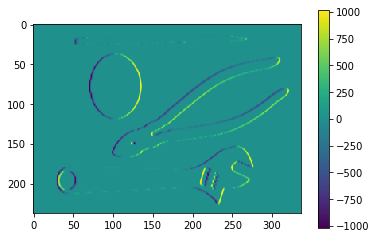

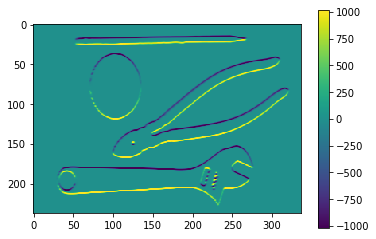

In [3]:
def compute_grad(I):

    Ix = conv_separable(I,np.array([-1,0,1]),np.array([1,2,1]))
    Iy = conv_separable(I,np.array([1,2,1]),np.array([-1,0,1]))
    return Ix, Iy

# example d'affichage du résultat
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [4]:
def compute_grad_mod_ori(I):
    Ix, Iy = compute_grad(I)
    Gn = np.sqrt(np.multiply(Ix,Ix)+np.multiply(Iy,Iy)) #peut etre carré de toute la matrice 
    Go = compute_grad_ori(Ix,Iy,Gn)
    aux = Go[np.where(Go!=0)]
    #print(aux[np.where(aux!=-1)])
    #print(np.max(Go))
    return Gn, Go

compute_grad_mod_ori(I)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]]))

In [5]:


def compute_sift_region(Gm, Go, mask=None):
    
    # Note: to apply the mask only when given, do:
    if mask is not None:
        Gmpond=np.multiply(Gm,mask)
    else:
        Gmpond=np.copy(Gm)
        
    k = 0
    ListR=[]
    test=np.copy(Go)
    #print(test.shape)
    test=test.reshape(4,4,16)
    #print(test.shape)
    #print('stop')
    for i in range(4):
        for j in range(4):
            Rtemp = np.zeros(8)
            for k in range(i*4,4*i+4):
                for l in range(4*j,4*j+4):
                    if Go[k][l]!=-1:
                        Rtemp[Go[k][l]] += Gmpond[k][l]
            ListR.append(Rtemp)
    Renc=np.stack(ListR).reshape(128)
    #print(Renc.shape)
    normRenc=np.linalg.norm(Renc,2)
    if normRenc<0.5:
        return np.zeros(128)
    Renc/=normRenc
    Renc=np.where(Renc>0.2,0.2,Renc)
    normRenc=np.linalg.norm(Renc,2)
    Renc/=normRenc
    return Renc



def compute_sift_region1(Gm, Go, mask=None):
    
    # Note: to apply the mask only when given, do:
    if mask is not None:
        Gmpond=np.multiply(Gm,mask)
    else:
        Gmpond=np.copy(Gm)
        
    k = 0
    ListR=[]
    Go=Go.reshape(4,4,16)
    print(Go)
    Gmpond=Gmpond.reshape(4,4,16)
    for i in range(Go.shape[0]):
        for j in range(Go.shape[1]):
            Rtemp = np.zeros(8)
            Rtemp[Go[i][j]]+=Gmpond[i][j]
            """for k in range(Go.shape[2]):
                if Go[i][j][k]!=-1:
                    Rtemp[Go[i][j][k]]+=Gmpond[i][j][k]"""
            ListR.append(Rtemp)  
    Renc=np.stack(ListR).reshape(128)
    #print(Renc.shape)
    normRenc=np.linalg.norm(Renc,2)
    if normRenc<0.5:
        return np.zeros(128)
    Renc/=normRenc
    Renc=np.where(Renc>0.2,0.2,Renc)
    normRenc=np.linalg.norm(Renc,2)
    Renc/=normRenc
    return Renc




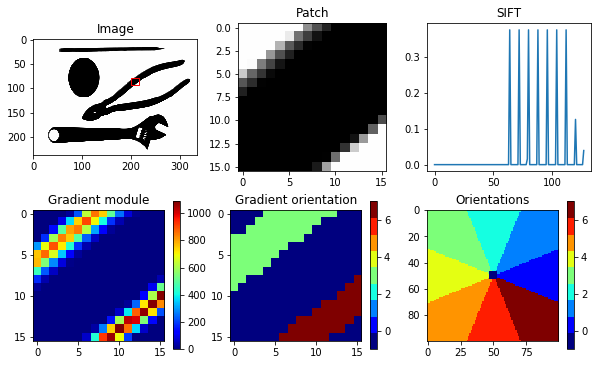

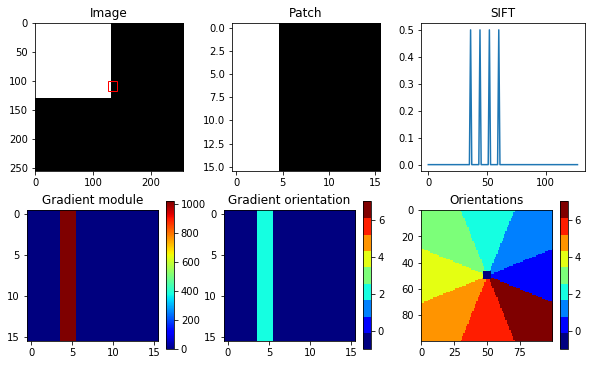

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [6]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
#display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=True)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
#display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
#display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)


3) on pondère par un masque gaussien pour se concentrer sur le centre des patchs pour récuperer l'information la plus importante

4) la discrétisation permet de limiter le nombre de valeur possible d'orientation, les orientations nous permettent ensuite de determiner l'orientation du gradient, le nombre d'orientation peut être modifié.
Les valeurs peuvent donc être plus facilement comparées

5) le post processing permet d'éliminer les valeurs extremes et de normaliser les vecteurs obtenues, les vecteurs faibles sont éliminées (zone sans interet)

6)Robuste à la rotation (grace a la discrétisation) equivariant à la rotation, la luminosité l'affecte peu,
les descripteurs sift correspondent à des orientations de gradient, et permettent donc de décrire de manière correcte les formes qui peuvent apparaitre au sein d'un patch

In [7]:
def compute_sift_image(I):
    x, y = dense_sampling(I)
    im = auto_padding(I)
    #print(im.shape)
    # TODO calculs communs aux patchs
    sifts = np.zeros([len(x), len(y), 128])
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            #print(xi)
            #print(yj)
            #print(im[xi:xi+16,yj:yj+16])
            Gn,Go=compute_grad_mod_ori(im[xi:xi+16,yj:yj+16])
            vec=compute_sift_region(Gn, Go, mask=None)
            sifts[i, j, :] = vec # TODO SIFT du patch de coordonnee (xi, yj)
    return sifts

res=compute_sift_image(I)


# Partie 2 : Dictionnaire visuel

In [8]:
# Ideally, restart the Python kernel to start from a clean slate
import os
import numpy as np
from tools import *
from sift import *
from sklearn.cluster import KMeans

In [9]:
# Paths config
dir_sc = os.path.join('data', 'Scene')
dir_sift = os.path.join('data', 'sift')
path_vdict = os.path.join('data', 'kmeans', 'vdict.npy')
path_vdsift = os.path.join('data', 'kmeans', 'vdsift.npy')
path_vdinames = os.path.join('data', 'kmeans', 'vdinames.npy')

inames, ilabls, cnames = load_dataset(dir_sc)

In [10]:
# If you want to look at the SIFTs that will be fed to compute_visual_dict:
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs


In [12]:
# Code here the `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]
    
    kmeans = KMeans(n_clusters=n_clusters,init='random',n_init=n_init,verbose=verbose)
    kmeans.fit(sift)
    cluster=np.vstack((kmeans.cluster_centers_,np.zeros(sift.shape[1])))
    cluster/=np.linalg.norm(cluster,2,axis=0)
    return cluster

    # TODO compute kmeans on `sift`, get cluster centers, add zeros vector
    
#compute_visual_dict(sifts_list_by_image)

In [13]:
# Run the visual dict computation (saved the first time)
vidct = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict


In [14]:
# Study of the dict
import time
import pdb
#vidct.shape
t=time.time()
#regions, sifts = get_regions_and_sifts(dir_sc, np.random.choice(inames, 30)) # Compute SIFT and regions from 30 random images
#display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions
print(time.time()-t)
# TODO visually analyze the dict through similar example regions
#
# Ideally, create `vdregions`, a numpy array of size 1001 x 16 x 16 where each of the 1001 elements is a
# "prototype" patch that is very close to the cluster center
import random
clu=vidct[random.randint(0,len(vidct))]
index_affiche=[]
eps=10e-1

for i,si in enumerate(sifts):
    #pdb.set_trace()
    if np.linalg.norm(clu-si,2)<eps: 
        #print('cc')
        index_affiche.append(i)
        
regions2=regions[index_affiche]
print(regions2.shape)
display_images(regions2[:100])

3.6716461181640625e-05


NameError: name 'sifts' is not defined

# Partie 3 : BoW

In [15]:
# Compute BoW for an image

def compute_feats(vdict, image_sifts):
    # TODO compute BoW from `image_sifts`
    z=np.zeros(len(vdict))
    for i in range(image_sifts.shape[0]):
        for j in range(image_sifts.shape[1]):
            test=image_sifts[i,j]-vdict
            normed=np.linalg.norm(test,2,axis=1)
            z[np.argmin(normed)]+=1   
    z/=np.linalg.norm(z,2)
    return z 

[0.02829937 0.00943312 0.00943312 ... 0.02829937 0.         0.07546498]


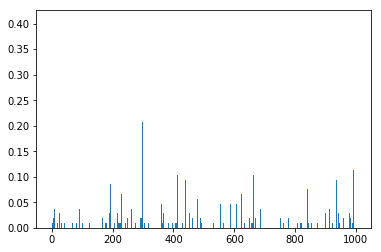

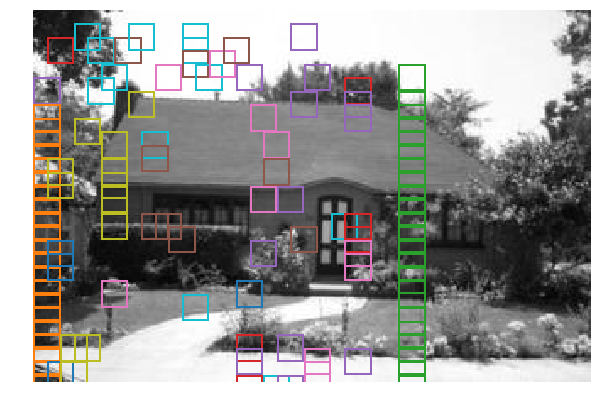

(9, 16, 16)


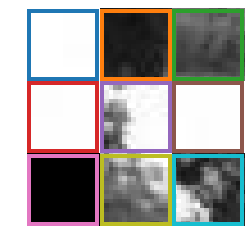

In [42]:
# Visualize your BoW on an image

iname = inames[0]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
regions = compute_regions(im)
feats = compute_feats(vidct, sift)
print(feats)

display_vdregions_image(im, vidct, sift, feats, vdregions=None) # if you have vdregions, add it as input here

In [ ]:
np.where(feats!=0)

In [ ]:
vidct

In [ ]:
a=vidct/np.linalg.norm(vidct,2,axis=0)

In [ ]:
a